# Running Results for Ben's Model
Each week I will try out my model (and anyone else's) to see how well they do for a selection of data sets.

This week I will try Australia, Japan, and the US.

In [9]:
import pandas
from plotly import graph_objs as go
from numpy import sqrt, ones_like


from model import fit, predict

## Australian Data

In [2]:
region_code = 'AU'
data = pandas.read_csv("https://storage.googleapis.com/covid19-open-data/v2/" +
                       region_code + "/main.csv")

In [3]:
y = data['total_confirmed']

X = data.drop(columns=[
    "new_confirmed", "new_deceased", "new_recovered",
    "total_confirmed", "total_deceased", "total_recovered",
    "new_hospitalized", "total_hospitalized", "current_hospitalized",
    "new_intensive_care", "total_intensive_care",
    "current_intensive_care", "new_ventilator", "total_ventilator",
    "current_ventilator"
])

Fit the model

In [4]:
params = fit(X, y)

Look at the parameters

In [5]:
pandas.DataFrame(dict(value=params))

,value
alpha,0.767338
beta,0.617561
delta,0.501215
gamma,0.613587
m,119.930821
t0,47.981864


How does it look?

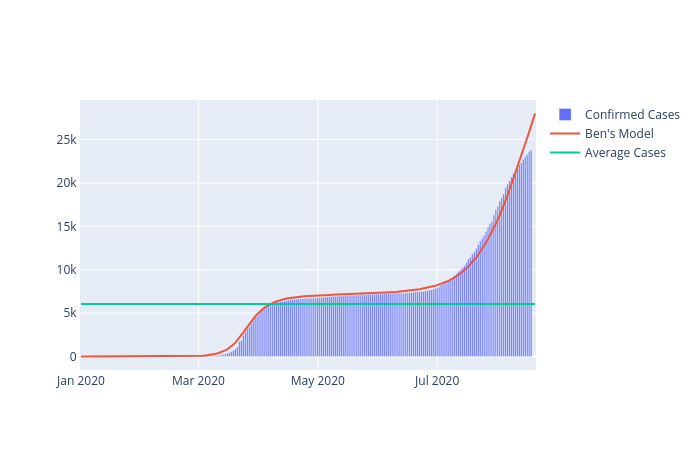

In [6]:
fig = go.Figure()
fig.add_trace(go.Bar(x=data['date'],
                     y=y,
                     name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=data['date'],
                         y=predict(X, **params),
                         name="Ben's Model"))
fig.add_trace(go.Scatter(x=data['date'],
                         y=ones_like(y)*y.mean(),
                         name='Average Cases'))
fig.show('png')

Let's get quantitative.

In [7]:
y_predict = predict(X, **params)
diff = y_predict - y
diff = diff[diff.notna()]
print('RMS Error is', round(sqrt((diff**2).sum()/len(diff)), 1), 'cases')

RMS Error is  539.7  cases


Compare to the RMS for the average case level.

In [10]:
y_mean = ones_like(y)*y.mean()
diff = y_mean - y
diff = diff[diff.notna()]
print('RMS Error is', round(sqrt((diff**2).sum()/len(diff)), 1), 'cases')

RMS Error is 5978.7 cases


## Japanese Data

In [11]:
region_code = 'JP'
data = pandas.read_csv("https://storage.googleapis.com/covid19-open-data/v2/" +
                       region_code + "/main.csv")

In [12]:
y = data['total_confirmed']

X = data.drop(columns=[
    "new_confirmed", "new_deceased", "new_recovered",
    "total_confirmed", "total_deceased", "total_recovered",
    "new_hospitalized", "total_hospitalized", "current_hospitalized",
    "new_intensive_care", "total_intensive_care",
    "current_intensive_care", "new_ventilator", "total_ventilator",
    "current_ventilator"
])

Fit the model

In [13]:
params = fit(X, y)

Look at the parameters

In [14]:
pandas.DataFrame(dict(value=params))

,value
alpha,0.735602
beta,0.585141
delta,0.467338
gamma,0.603998
m,119.595783
t0,41.185411


How does it look?

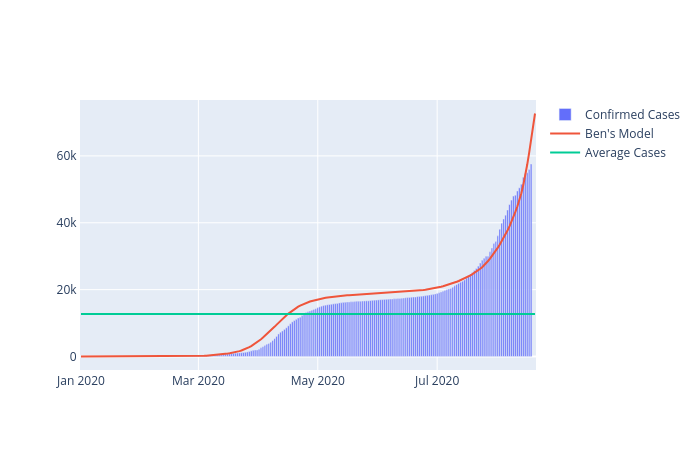

In [16]:
fig = go.Figure()
fig.add_trace(go.Bar(x=data['date'],
                     y=y,
                     name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=data['date'],
                         y=predict(X, **params),
                         name="Ben's Model"))
fig.add_trace(go.Scatter(x=data['date'],
                         y=ones_like(y)*y.mean(),
                         name='Average Cases'))
fig.show('png')

What's the RMS error?

In [17]:
y_predict = predict(X, **params)
diff = y_predict - y
diff = diff[diff.notna()]
print('RMS Error is', round(sqrt((diff**2).sum()/len(diff)), 1), 'cases')

RMS Error is  2155.7  cases


Compare to the RMS for the average case level.

In [18]:
y_mean = ones_like(y)*y.mean()
diff = y_mean - y
diff = diff[diff.notna()]
print('RMS Error is', round(sqrt((diff**2).sum()/len(diff)), 1), 'cases')

RMS Error is 13772.6 cases


## US Data

In [19]:
region_code = 'US'
data = pandas.read_csv("https://storage.googleapis.com/covid19-open-data/v2/" +
                       region_code + "/main.csv")

In [20]:
y = data['total_confirmed']

X = data.drop(columns=[
    "new_confirmed", "new_deceased", "new_recovered",
    "total_confirmed", "total_deceased", "total_recovered",
    "new_hospitalized", "total_hospitalized", "current_hospitalized",
    "new_intensive_care", "total_intensive_care",
    "current_intensive_care", "new_ventilator", "total_ventilator",
    "current_ventilator"
])

Fit the model

In [21]:
params = fit(X, y)

Look at the parameters

In [22]:
pandas.DataFrame(dict(value=params))

,value
alpha,0.807040
beta,0.609144
delta,0.536328
gamma,0.609767
m,120.209091
t0,38.848314


How does it look?

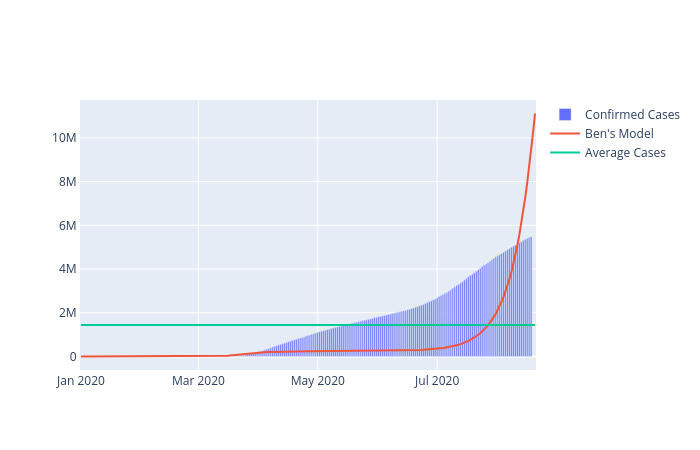

In [23]:
fig = go.Figure()
fig.add_trace(go.Bar(x=data['date'],
                     y=y,
                     name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=data['date'],
                         y=predict(X, **params),
                         name="Ben's Model"))
fig.add_trace(go.Scatter(x=data['date'],
                         y=ones_like(y)*y.mean(),
                         name='Average Cases'))
fig.show('png')

What's the RMS error?

In [24]:
y_predict = predict(X, **params)
diff = y_predict - y
diff = diff[diff.notna()]
print('RMS Error is', round(sqrt((diff**2).sum()/len(diff)), 1),' cases')

RMS Error is 1418758.9  cases


Compare to the RMS for the average case level.

In [25]:
y_mean = ones_like(y)*y.mean()
diff = y_mean - y
diff = diff[diff.notna()]
print('RMS Error is', round(sqrt((diff**2).sum()/len(diff)), 1), 'cases')

RMS Error is 1632220.2 cases


## US Data up to April

In [42]:
region_code = 'US'
data = pandas.read_csv("https://storage.googleapis.com/covid19-open-data/v2/" +
                       region_code + "/main.csv")
data = data[data['date'] < '2020-04-01']

In [43]:
y = data['total_confirmed']

X = data.drop(columns=[
    "new_confirmed", "new_deceased", "new_recovered",
    "total_confirmed", "total_deceased", "total_recovered",
    "new_hospitalized", "total_hospitalized", "current_hospitalized",
    "new_intensive_care", "total_intensive_care",
    "current_intensive_care", "new_ventilator", "total_ventilator",
    "current_ventilator"
])

Fit the model

In [44]:
params = fit(X, y)

Look at the parameters

In [45]:
pandas.DataFrame(dict(value=params))

,value
alpha,0.787265
beta,0.586521
delta,0.508178
gamma,0.579806
m,120.027651
t0,41.256501


How does it look?

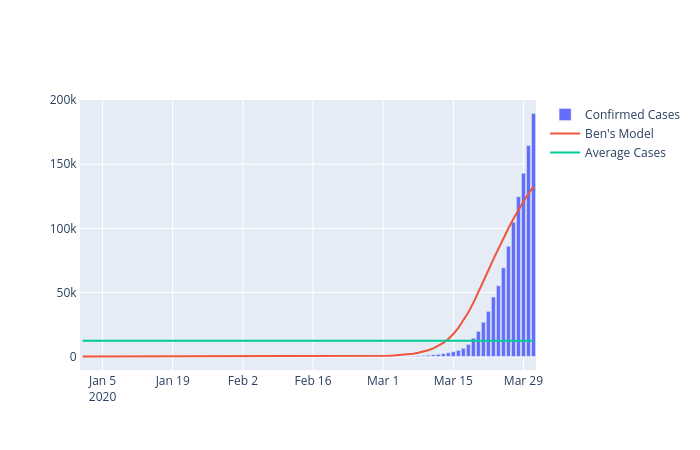

In [46]:
fig = go.Figure()
fig.add_trace(go.Bar(x=data['date'],
                     y=y,
                     name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=data['date'],
                         y=predict(X, **params),
                         name="Ben's Model"))
fig.add_trace(go.Scatter(x=data['date'],
                         y=ones_like(y)*y.mean(),
                         name='Average Cases'))
fig.show('png')

What's the RMS error?

In [47]:
y_predict = predict(X, **params)
diff = y_predict - y
diff = diff[diff.notna()]
print('RMS Error is ', round(sqrt((diff**2).sum()/len(diff)), 1), ' cases')

RMS Error is  12099.8  cases


Compare to the RMS for the average case level.

In [48]:
y_mean = ones_like(y)*y.mean()
diff = y_mean - y
diff = diff[diff.notna()]
print('RMS Error is', round(sqrt((diff**2).sum()/len(diff)), 1), 'cases')

RMS Error is 35770.6 cases
